<a href="https://colab.research.google.com/github/Rajora0/ml_fraud_detection/blob/main/Modelos_preditivos_em_dados_detec%C3%A7%C3%A3o_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos preditivos em dados: detecção de fraude

---


## Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

!ls '/gdrive/MyDrive/ML_DETECT_FRAUDE/Dados/'

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
fraud_dataset_example.csv


## ETL

In [ ]:
#!wget https://caelum-online-public.s3.amazonaws.com/2423-modelos-preditivos-dados/01/fraud_dataset_example.csv -O /gdrive/MyDrive/ML_DETECT_FRAUDE/Dados/fraud_dataset_example.csv

## Pipeline do Projeto

**1) Descobrindo o problema**

Com o problema definido, é mais fácil conseguir soluções para ele. Portanto, essa etapa é crucial, pois irá definir as próximas fases a serem seguidas para resolver a questão encontrada.


**2) Coleta dos dados**

Na coleta de dados, precisamos fazer um levantamento de todos os dados e compreender se são bases de dados internas ou externas à empresa e se o seu formato é estruturado ou não. Nesta etapa, precisamos estar alinhados ao problema, pois a base de dados utilizada deve ser condizente para propor uma solução ao problema definido.



**3) Limpeza/Tratamento de dados**

Na grande maioria das vezes, os dados coletados apresentaram valores faltantes, registros incoerentes e outliers (quando se diferenciam totalmente dos outros dados). Além disso, as variáveis podem estar em um formato inadequado para utilização de um algoritmo de machine learning, se esse for o objetivo do projeto. Essa é uma das fases que exige maior trabalho e tem como objetivo o tratamento dos dados para que fiquem adequados para análise.



**4) Análise Exploratória de dados**

Chegando nesse estágio da pipeline, nossos dados já estão tratados e livres de valores faltantes. Podemos começar a identificar padrões, muitas vezes ocultos, para que possamos mapear e entender melhor o problema a ser solucionado.



**5) Modelagem dos dados**

A modelagem de dados é o ponto em que os modelos de machine learning são utilizados para extrair o padrão dos dados e resolver o problema de negócio que foi identificado na primeira etapa do pipeline. O tipo de algoritmo a ser utilizado dependerá do tipo de problema a ser resolvido. Diversos algoritmos são testados e aquele que apresenta o melhor desempenho é selecionado.



**6) Interpretação dos dados**

Essa etapa é a mais subjetiva de todas, já que depende da interpretação de cada cientista de dados. Nela, avaliamos os resultados obtidos e precisamos entender como cada ponto se encaixa para que esse resultado possa ser explicado para outras equipes, de forma simples e direta.



**7) Aplicando melhorias**

Conforme o tempo passa, o modelo construído ou a análise que foi feita pode não ser aplicável da mesma forma para dados atualizados. Portanto, revisões são fundamentais para manter a efetividade do projeto.

## Carregando os dados

- https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example?select=fraud_dataset_example.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '/gdrive/MyDrive/ML_DETECT_FRAUDE/Dados/'

In [ ]:
fraud_dataset = pd.read_csv(path+'fraud_dataset_example.csv')
fraud_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Analise exploratoria

**step** - unit of time (1 hour)

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - transaction amount in local currency.

**nameOrig** - transaction originator

**oldbalanceOrg** - initial balance (before transaction)

**newbalanceOrig** - new balance (after transaction)

**nameDest** - transaction recipient

**oldbalanceDest** - initial balance before transaction.

**newbalanceDest** - new balance after transaction.

**isFraud** - Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.

**isFlaggedFraud** - An illegal attempt to transfer massive amount of money in a single transaction.



In [ ]:
# Valores unicos

def unique(df):
  for col in df.columns:
    print('*'*100)
    print(f'Column name: {col}, Len: {len(df[col])}')
    print(df[col].unique())

In [ ]:
unique(fraud_dataset)

****************************************************************************************************
Column name: step, Len: 101613
[ 1  2  3  4  5  6  7  8  9 10]
****************************************************************************************************
Column name: type, Len: 101613
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
****************************************************************************************************
Column name: amount, Len: 101613
[9.83964000e+03 1.86428000e+03 1.81000000e+02 ... 1.72890100e+04
 1.34714645e+06 4.69539210e+05]
****************************************************************************************************
Column name: nameOrig, Len: 101613
['C1231006815' 'C1666544295' 'C1305486145' ... 'C807582280' 'C1315779140'
 'C515691325']
****************************************************************************************************
Column name: oldbalanceOrg, Len: 101613
[1.7013600e+05 2.1249000e+04 1.8100000e+02 ... 7.624000

In [ ]:
# Ordenar por fraude

fraud_dataset = fraud_dataset[['isFraud',
                               'isFlaggedFraud',
                               'step', 
                               'type', 
                               'amount', 
                               'nameOrig', 
                               'oldbalanceOrg', 
                               'newbalanceOrig',
                               'nameDest', 
                               'oldbalanceDest', 
                               'newbalanceDest']]

In [ ]:
fraud_dataset.columns

Index(['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig',
       'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [ ]:
# Renomear colunas

colunas = { 'isFraud': 'fraude',
           'isFlaggedFraud': 'super_fraude',
           'step': 'tempo', 
           'type': 'tipo', 
           'amount':'valor', 
           'nameOrig': 'cliente1', 
           'oldbalanceOrg': 'saldo_inicial_c1', 
           'newbalanceOrig': 'novo_saldo_c1',
           'nameDest': 'cliente2', 
           'oldbalanceDest': 'saldo_inicial_c2', 
           'newbalanceDest': 'novo_saldo_c2' 
           
           }

In [ ]:
fraud_dataset.rename(columns=colunas,inplace=True)
fraud_dataset.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [ ]:
# Describe

fraud_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


## Encoding

In [ ]:
fraud_dataset = pd.get_dummies(fraud_dataset,columns=['tipo'])
fraud_dataset.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [ ]:
fraud_dataset = fraud_dataset.drop(columns=['super_fraude','cliente1','cliente2'])
fraud_dataset.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


## Regressão logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification

In [ ]:
# 

def compile_model(dataset,column):

  x = dataset.drop(column,axis=1)
  y = dataset[column]
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
  LR = LogisticRegression(max_iter=1000, random_state=42, solver="lbfgs")
  LR.fit(X_train, y_train)
  y_pred = LR.predict(X_test)
  print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')
  print(f'recall_score: {recall_score(y_test,y_pred)}')
  print(f'precision_score: {precision_score(y_test,y_pred)}')
  print(f'f1_score: {f1_score(y_test,y_pred)}')

In [ ]:
x = fraud_dataset.drop('fraude',axis=1)
y = fraud_dataset['fraude']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
LR = LogisticRegression(max_iter=1000, random_state=42, solver="lbfgs")
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9989765391276965
0.043478260869565216
0.2
0.07142857142857142


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25381
           1       0.20      0.04      0.07        23

    accuracy                           1.00     25404
   macro avg       0.60      0.52      0.54     25404
weighted avg       1.00      1.00      1.00     25404



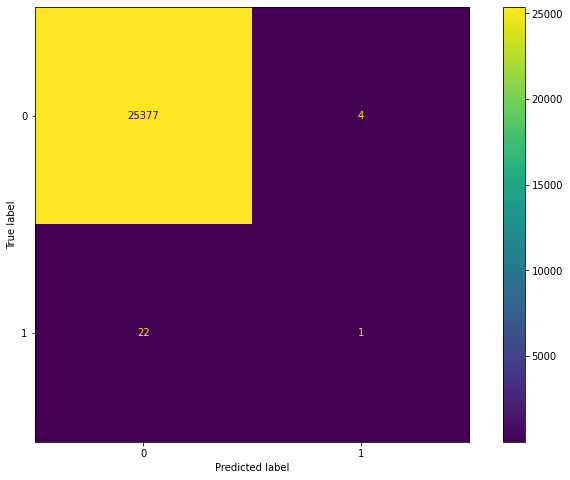

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

- https://towardsdatascience.com/predict-vs-predict-proba-scikit-learn-bdc45daa5972

In [ ]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
y_pred_proba

array([1.04689952e-01, 1.34611381e-04, 5.23848833e-05, ...,
       1.23888077e-04, 1.63349453e-04, 1.03311317e-04])

In [ ]:
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize'] = (12,8)

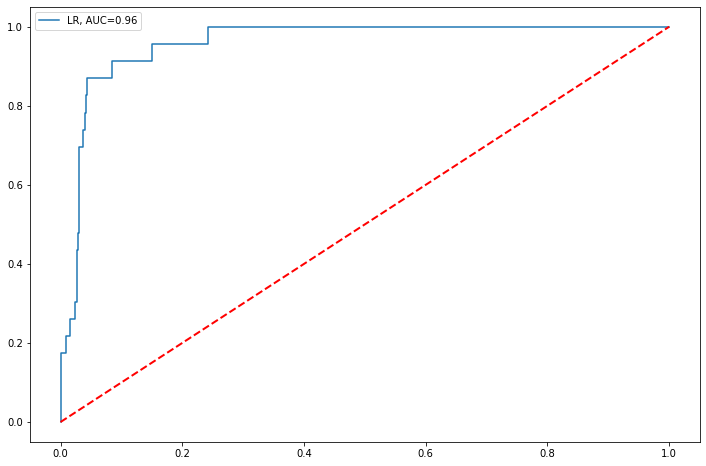

In [ ]:
plt.plot(fpr, tpr, label=f'LR, AUC={round(auc,2)}')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend()

## Balanceado os dados

In [ ]:
!pip install -U imbalanced-learn -qq

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [ ]:
x_resampled

,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
202989,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [ ]:
y_resampled.value_counts()

0    101497
1    101497
Name: fraude, dtype: int64

In [ ]:
fraud_dataset_balanced = pd.concat([y_resampled,x_resampled],axis=1)
fraud_dataset_balanced.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [ ]:
compile_model(fraud_dataset_balanced,column='fraude')

accuracy_score: 0.9417722516699837
recall_score: 0.9623125493291239
precision_score: 0.9241993556945234
f1_score: 0.9428709521507975


In [ ]:
fraud_dataset_balanced.corr()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
fraude,1.000000,-0.610210,0.157292,-0.097309,-0.217389,-0.198354,-0.136893,-0.335524,0.055726,-0.070784,-0.495865,0.368623
tempo,-0.610210,1.000000,-0.084933,0.060895,0.134182,0.136872,0.085294,0.213127,-0.044484,-0.002550,0.255090,-0.245669
valor,0.157292,-0.084933,1.000000,0.389222,-0.006486,0.047346,0.322891,-0.052456,0.029092,-0.024035,-0.164748,0.095887
saldo_inicial_c1,-0.097309,0.060895,0.389222,1.000000,0.911043,0.112373,0.176684,0.491920,-0.123125,-0.018369,-0.115681,-0.083990
novo_saldo_c1,-0.217389,0.134182,-0.006486,0.911043,1.000000,0.137073,0.090341,0.590445,-0.150995,-0.012364,-0.073435,-0.120818
saldo_inicial_c2,-0.198354,0.136872,0.047346,0.112373,0.137073,1.000000,0.869219,0.166567,0.113299,0.011343,-0.139960,-0.042973
novo_saldo_c2,-0.136893,0.085294,0.322891,0.176684,0.090341,0.869219,1.000000,0.100555,0.185023,0.003317,-0.184296,-0.051143
tipo_CASH_IN,-0.335524,0.213127,-0.052456,0.491920,0.590445,0.166567,0.100555,1.000000,-0.237707,-0.023750,-0.166374,-0.190196
tipo_CASH_OUT,0.055726,-0.044484,0.029092,-0.123125,-0.150995,0.113299,0.185023,-0.237707,1.000000,-0.050148,-0.351303,-0.401604
tipo_DEBIT,-0.070784,-0.002550,-0.024035,-0.018369,-0.012364,0.011343,0.003317,-0.023750,-0.050148,1.000000,-0.035099,-0.040125


## Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def compile_model(model,dataset,column):

  x = dataset.drop(column,axis=1)
  y = dataset[column]
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
  Model = model
  Model.fit(X_train, y_train)
  y_pred = Model.predict(X_test)
  y_pred_proba = Model.predict_proba(X_test)[::,1]

  return y_test,y_pred,y_pred_proba

def metrics_model(model,dataset,column):

  y_test,y_pred,y_pred_proba = compile_model(model,dataset,column)
  
  print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')
  print(f'recall_score: {recall_score(y_test,y_pred)}')
  print(f'precision_score: {precision_score(y_test,y_pred)}')
  print(f'f1_score: {f1_score(y_test,y_pred)}')

def roc_curve_plot(model,dataset,column,label_model):

  y_test,y_pred,y_pred_proba = compile_model(model,dataset,column)

  fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
  auc = roc_auc_score(y_test,y_pred_proba)

  plt.rcParams['figure.figsize'] = (12,8)

  plt.plot(fpr, tpr, label=f'{label_model}, AUC={round(auc,2)}')
  plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
  plt.legend()

In [ ]:
metrics_model(DecisionTreeClassifier(max_depth=5,random_state=42),
              fraud_dataset_balanced,
              column='fraude')

accuracy_score: 0.9622849711324362
recall_score: 0.9897000789265983
precision_score: 0.9381639982043992
f1_score: 0.9632432017206943


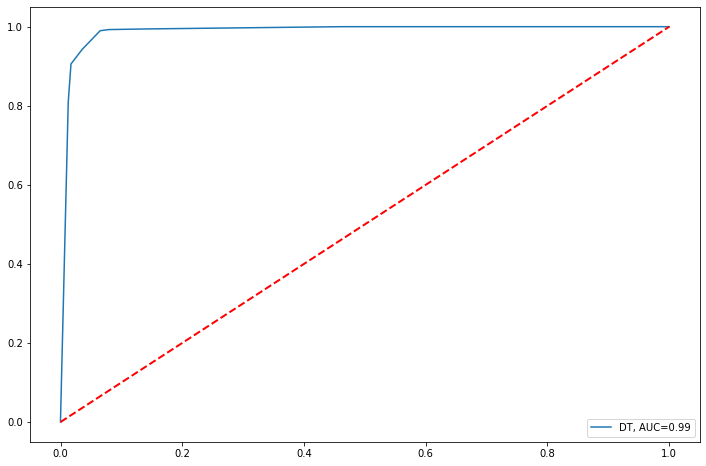

In [ ]:
roc_curve_plot(DecisionTreeClassifier(max_depth=5,random_state=42),
               fraud_dataset_balanced,
               column='fraude',
               label_model='DT')

In [ ]:
metrics_model(RandomForestClassifier(max_depth=5,random_state=42),
              fraud_dataset_balanced,
              column='fraude')

accuracy_score: 0.9723738398786183
recall_score: 0.9742699289660616
precision_score: 0.9705165500432424
f1_score: 0.9723896175509079


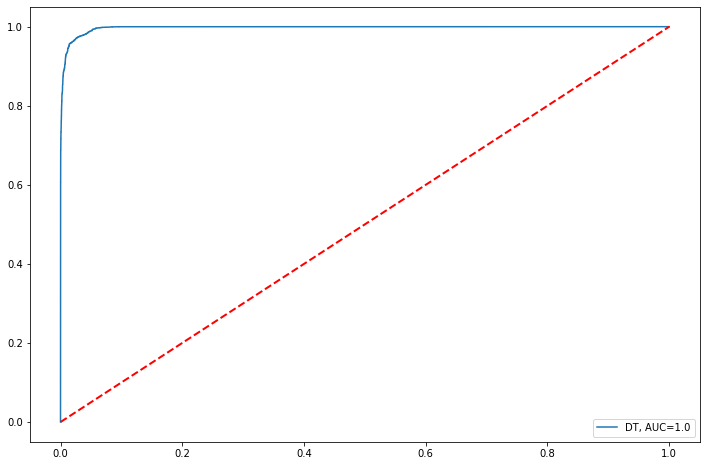

In [ ]:
roc_curve_plot(RandomForestClassifier(max_depth=5,random_state=42),
               fraud_dataset_balanced,
               column='fraude',
               label_model='DT')

## Comparação modelos

In [ ]:
  x = fraud_dataset_balanced.drop('fraude',axis=1)
  y = fraud_dataset_balanced['fraude']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
SEED = 42

classifiers = [LogisticRegression(max_iter=1000, random_state=SEED),
               DecisionTreeClassifier(max_depth = 5, random_state=SEED),
               RandomForestClassifier(max_depth= 5, random_state = SEED)]

In [ ]:
for clf in classifiers:
  clf.fit(X_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  print("F1:", f1_score(y_test, y_pred))

LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9622849711324362
Precision: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943
RandomForestClassifier
****Resultados****
Accuracy: 0.9723738398786183
Precision: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


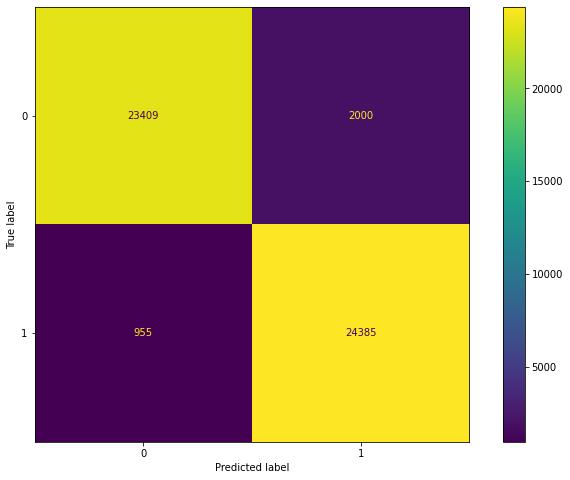

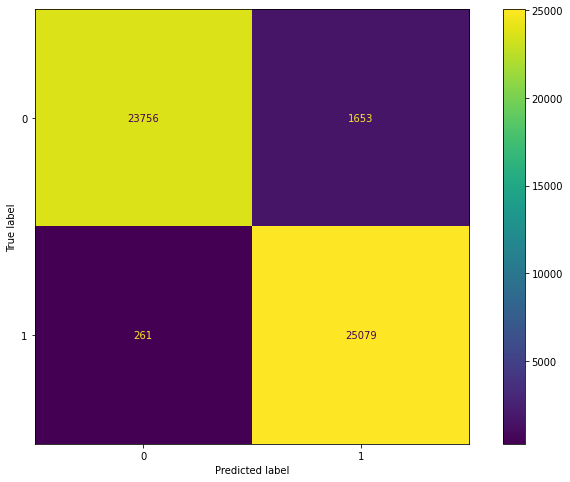

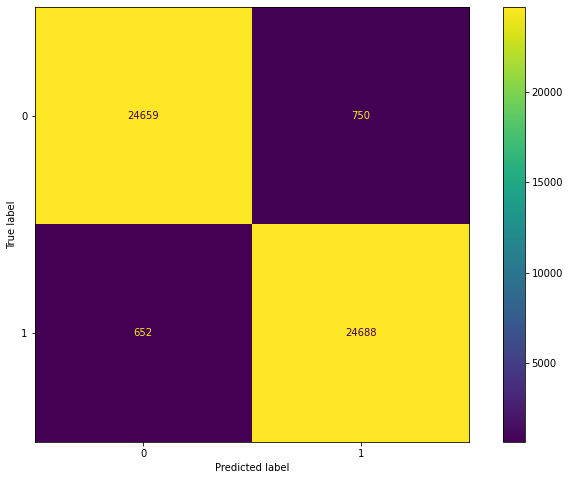

In [ ]:
for clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = list(np.arange(20, 200, step=20))
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap 
}

In [ ]:
RF = RandomForestClassifier(random_state=42)

In [ ]:
RV = RandomizedSearchCV(
    RF, param_grid, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42
)

In [ ]:
%%time
RCV = RV.fit(x, y) 

CPU times: user 52.5 s, sys: 426 ms, total: 52.9 s
Wall time: 7min 37s


In [ ]:
pd.DataFrame(RCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,46.223235,6.188510,1.138801,0.040109,160,8,1,sqrt,8,gini,False,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.988532,0.999675,0.991783,0.993330,0.004679,1
1,13.005331,0.089478,0.702322,0.014318,120,8,4,sqrt,4,gini,True,"{'n_estimators': 120, 'min_samples_split': 8, ...",0.963289,0.995951,0.970413,0.976551,0.014023,4
2,15.471751,0.031295,0.869566,0.011367,180,6,4,sqrt,2,gini,False,"{'n_estimators': 180, 'min_samples_split': 6, ...",0.934973,0.946738,0.947653,0.943121,0.005774,10
3,13.962614,0.210928,0.946801,0.222372,160,2,1,auto,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.935002,0.949133,0.946087,0.943407,0.006072,9
4,6.875292,0.542468,0.404568,0.039058,40,4,1,log2,3,gini,False,"{'n_estimators': 40, 'min_samples_split': 4, '...",0.939584,0.991724,0.987142,0.972817,0.023574,5
5,9.469681,0.543708,0.375445,0.015678,40,2,1,sqrt,5,gini,False,"{'n_estimators': 40, 'min_samples_split': 2, '...",0.970028,0.999084,0.974048,0.981053,0.012855,3
6,23.955834,0.842138,1.489468,0.106211,160,8,1,sqrt,3,gini,True,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.940264,0.994325,0.964294,0.966294,0.022116,7
7,54.363700,2.589732,1.842245,0.016381,160,8,4,sqrt,7,entropy,True,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.980965,0.999970,0.978305,0.986413,0.009648,2
8,29.973095,0.628796,1.197279,0.021113,160,8,2,auto,3,gini,False,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.941830,0.994768,0.962373,0.966324,0.021792,6
9,33.614799,4.678230,1.166619,0.130355,140,2,1,log2,3,entropy,False,"{'n_estimators': 140, 'min_samples_split': 2, ...",0.935800,0.994768,0.962373,0.964314,0.024113,8


In [ ]:
RCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 160}

In [ ]:
rf = RandomForestClassifier(**RCV.best_params_, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9903643421545252
Precision: 0.9868354033616737
Recall: 0.9939621152328335
F1: 0.9903859386980712


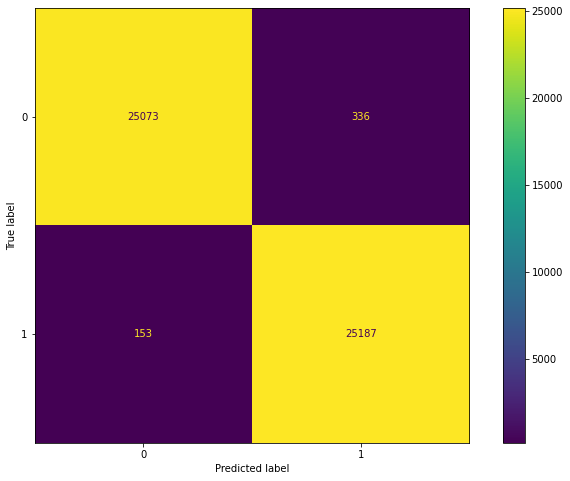

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()